In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from google.colab import files
uploaded=files.upload()
%matplotlib inline

Saving K_means.csv to K_means.csv


In [ ]:
df = pd.read_csv("K_means.csv")
df.head()

,Name,Age,Income
0,Sam,27,70000
1,Sunil,29,90000
2,Nimal,29,61000
3,Kamal,28,60000
4,Anil,42,150000


Text(0, 0.5, 'Income')

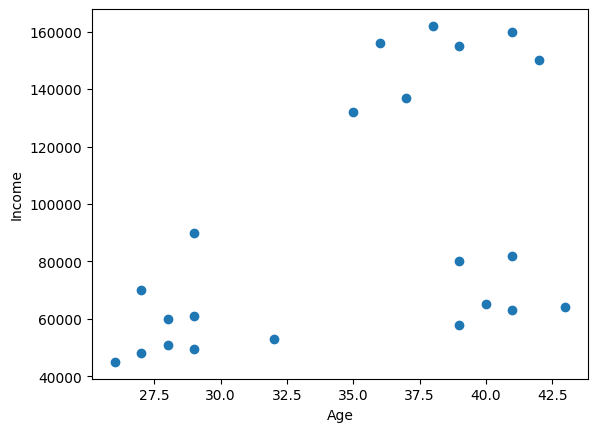

In [ ]:
plt.scatter(df.Age,df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head(10)

,Name,Age,Income,cluster
0,Sam,27,70000,1
1,Sunil,29,90000,1
2,Nimal,29,61000,2
3,Kamal,28,60000,2
4,Anil,42,150000,0
5,Ranil,39,155000,0
6,Asoka,41,160000,0
7,Seetha,38,162000,0
8,Suneetha,36,156000,0
9,Sumedha,35,132000,0


In [ ]:
km.cluster_centers_

array([[3.82857143e+01, 1.50285714e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

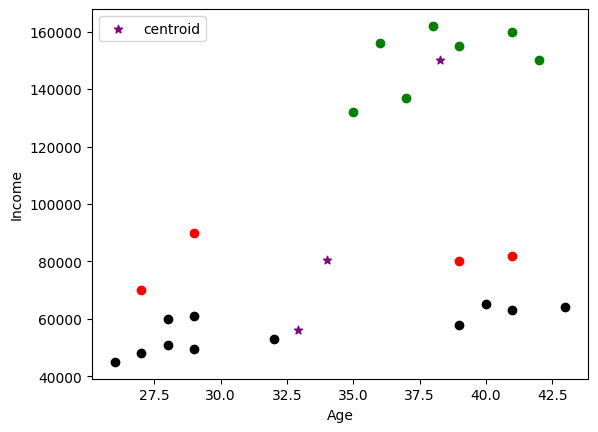

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()


In [ ]:
scaler = MinMaxScaler() # will normalize the min and max distribution across a propotionate scale. This will make the dataset methodical.
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])


In [ ]:
df.head()

,Name,Age,Income,cluster
0,Sam,0.058824,0.213675,1
1,Sunil,0.176471,0.384615,1
2,Nimal,0.176471,0.136752,2
3,Kamal,0.117647,0.128205,2
4,Anil,0.941176,0.897436,0


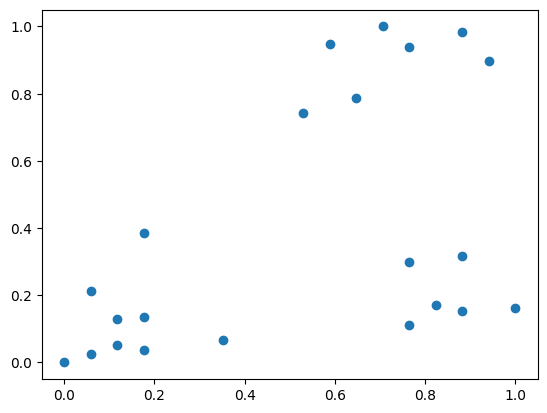

In [ ]:
plt.scatter(df.Age,df['Income'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head(23)

,Name,Age,Income,cluster
0,Sam,0.058824,0.213675,1
1,Sunil,0.176471,0.384615,1
2,Nimal,0.176471,0.136752,1
3,Kamal,0.117647,0.128205,1
4,Anil,0.941176,0.897436,2
5,Ranil,0.764706,0.940171,2
6,Asoka,0.882353,0.982906,2
7,Seetha,0.705882,1.000000,2
8,Suneetha,0.588235,0.948718,2
9,Sumedha,0.529412,0.743590,2


In [ ]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8998779 ]])

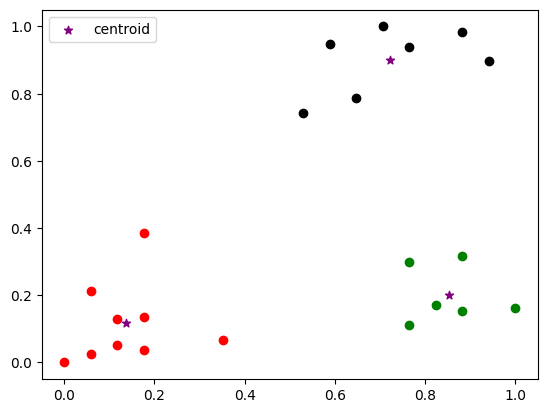

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age','Income']])
  sse.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

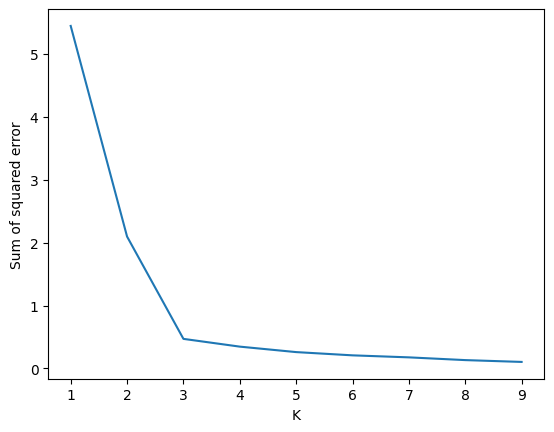

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
#Elbow Technique will determine the eligible set of clusters of the given dataset. For this dataset, it`s 3. It`s clearly denoted as\n","#an elbow in the above grapg